# Predicting Social Media Engagement Rate

#### Javier Corpus

### Visualizations

In [71]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Social Media Engagement Dataset.csv')

Dropping columns that are not necessary

In [72]:
df = df.drop(columns=[
    'post_id', 'user_id', 'text_content', 'hashtags', 'mentions', 'keywords',
    'campaign_phase', 'user_past_sentiment_avg', 'user_engagement_growth', 'buzz_change_rate'
])

### Number of posts per Platform

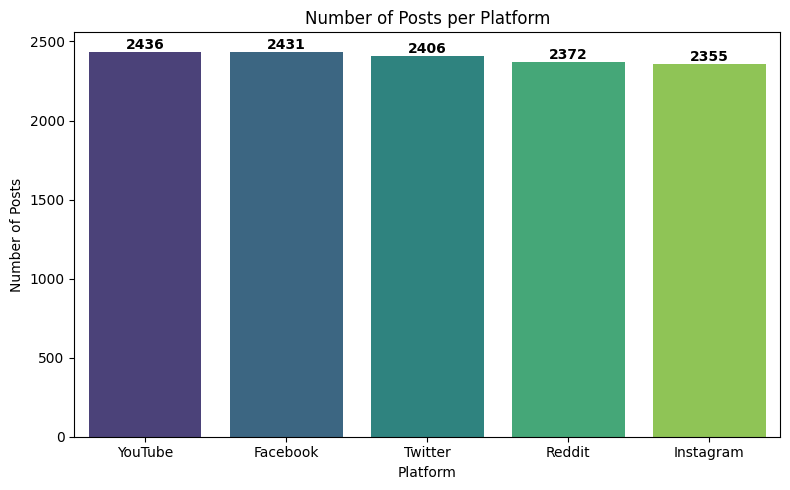

In [73]:
# Comparing number of posts per platform.
platform_counts = df['platform'].value_counts().reset_index()
platform_counts.columns = ['platform', 'count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=platform_counts,
x='platform',
y='count',
palette='viridis',
hue='platform')

for i, row in platform_counts.iterrows():
    ax.text(i, row['count'], row['count'], ha='center', va='bottom', fontweight='bold')

plt.title('Number of Posts per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()

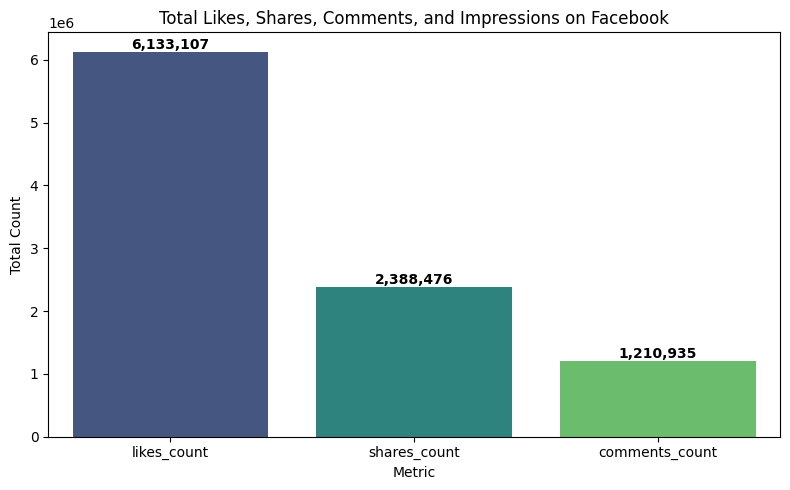

In [79]:
# Select Facebook posts and aggregate sums for the specified columns
facebook_counts = df[df['platform'] == 'Facebook'][['likes_count', 'shares_count', 'comments_count']].sum()
facebook_counts = facebook_counts.reset_index()
facebook_counts.columns = ['Metric', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=facebook_counts, x='Metric', y='Count', palette='viridis', hue='Metric')

# Annotate each bar with its value
for i, row in facebook_counts.iterrows():
    ax.text(i, row['Count'], f"{int(row['Count']):,}", ha='center', va='bottom', fontweight='bold')

plt.title('Total Likes, Shares, Comments, and Impressions on Facebook')
plt.xlabel('Metric')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

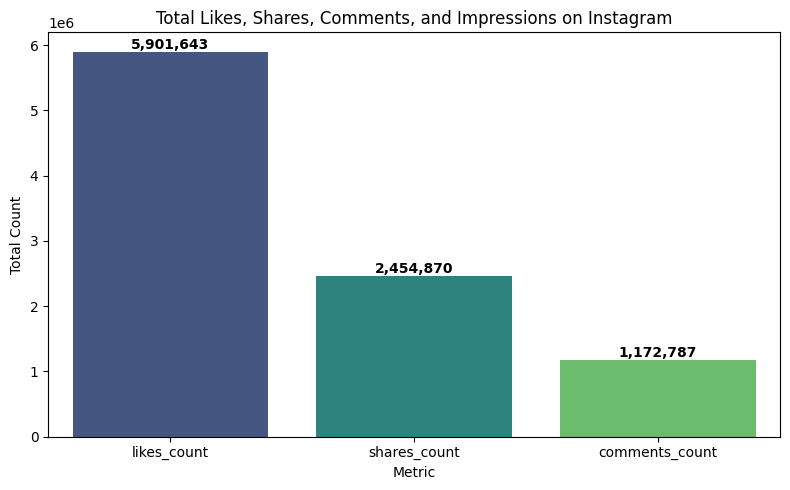

In [78]:
# Select Instagram posts and aggregate sums for the specified columns
instagram_counts = df[df['platform'] == 'Instagram'][['likes_count', 'shares_count', 'comments_count']].sum()
instagram_counts = instagram_counts.reset_index()
instagram_counts.columns = ['Metric', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=instagram_counts, x='Metric', y='Count', palette='viridis', hue='Metric')

# Annotate each bar with its value
for i, row in instagram_counts.iterrows():
    ax.text(i, row['Count'], f"{int(row['Count']):,}", ha='center', va='bottom', fontweight='bold')

plt.title('Total Likes, Shares, Comments, and Impressions on Instagram')
plt.xlabel('Metric')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

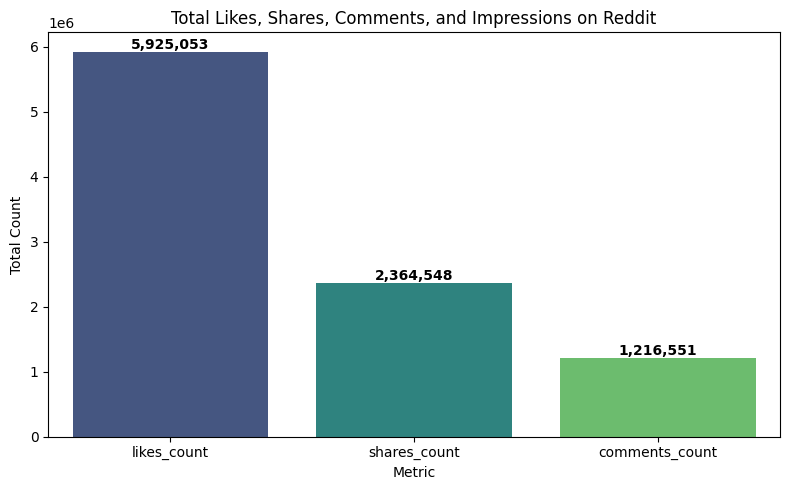

In [83]:
# Select Reddit posts and aggregate sums for the specified columns
reddit_counts = df[df['platform'] == 'Reddit'][['likes_count', 'shares_count', 'comments_count']].sum()
reddit_counts = reddit_counts.reset_index()
reddit_counts.columns = ['Metric', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=reddit_counts, x='Metric', y='Count', palette='viridis', hue='Metric')

# Annotate each bar with its value
for i, row in reddit_counts.iterrows():
    ax.text(i, row['Count'], f"{int(row['Count']):,}", ha='center', va='bottom', fontweight='bold')

plt.title('Total Likes, Shares, Comments, and Impressions on Reddit')
plt.xlabel('Metric')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

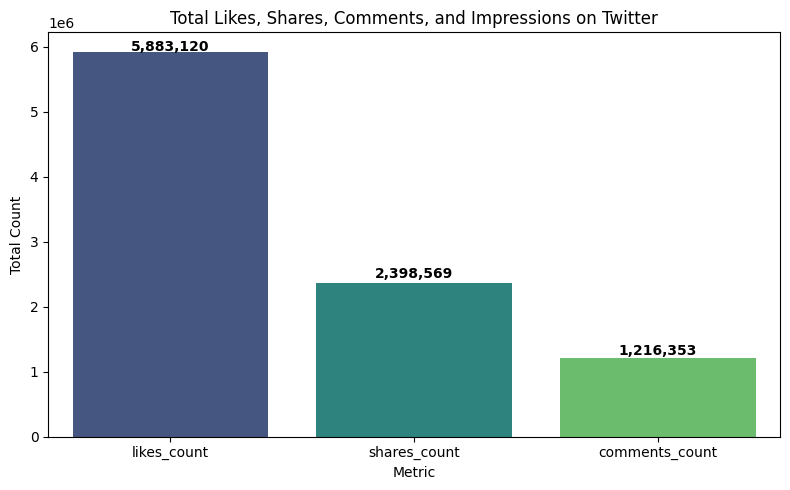

In [84]:
# Select Twitter posts and aggregate sums for the specified columns
twitter_counts = df[df['platform'] == 'Twitter'][['likes_count', 'shares_count', 'comments_count']].sum()
twitter_counts  = twitter_counts.reset_index()
twitter_counts.columns = ['Metric', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=reddit_counts, x='Metric', y='Count', palette='viridis', hue='Metric')

# Annotate each bar with its value
for i, row in twitter_counts.iterrows():
    ax.text(i, row['Count'], f"{int(row['Count']):,}", ha='center', va='bottom', fontweight='bold')

plt.title('Total Likes, Shares, Comments, and Impressions on Twitter')
plt.xlabel('Metric')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

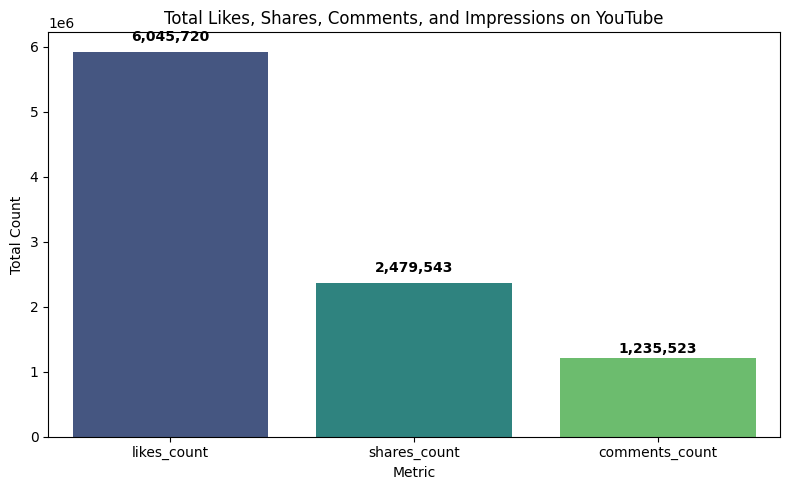

In [85]:
# Select YouTube posts and aggregate sums for the specified columns
youtube_counts = df[df['platform'] == 'YouTube'][['likes_count', 'shares_count', 'comments_count']].sum()
youtube_counts  = youtube_counts.reset_index()
youtube_counts.columns = ['Metric', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=reddit_counts, x='Metric', y='Count', palette='viridis', hue='Metric')

# Annotate each bar with its value
for i, row in youtube_counts.iterrows():
    ax.text(i, row['Count'], f"{int(row['Count']):,}", ha='center', va='bottom', fontweight='bold')

plt.title('Total Likes, Shares, Comments, and Impressions on YouTube')
plt.xlabel('Metric')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

### Sentiment Score Distribution by Emotion - Twitter

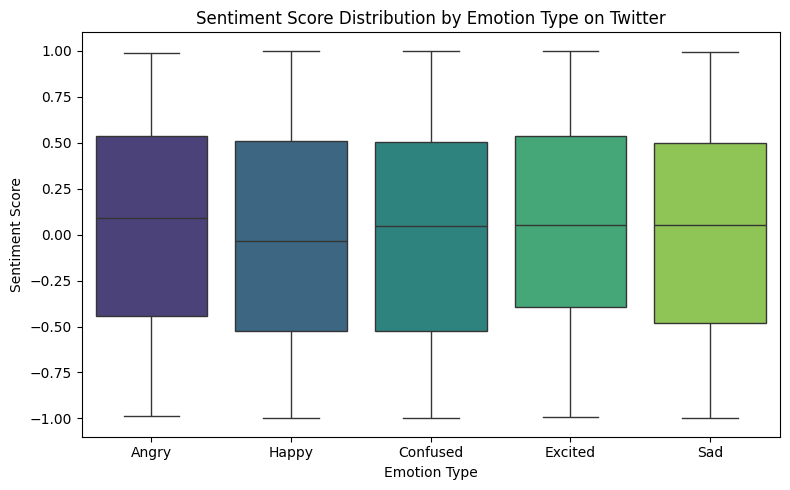

In [13]:
# Sentiment Score Distribution by Emotion - Twitter
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df[df['platform'] == 'Twitter'],
    x='emotion_type',
    y='sentiment_score',
    palette='viridis',
    hue='emotion_type',
)
plt.title('Sentiment Score Distribution by Emotion Type on Twitter')
plt.xlabel('Emotion Type')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.show()

### Sentiment Score Distribution by Emotion - Reddit

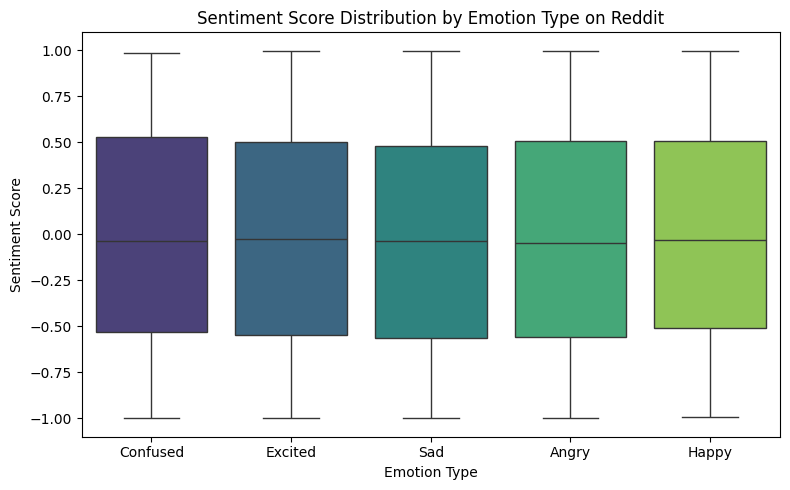

In [14]:
# Sentiment Score Distribution by Emotion - Reddit
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df[df['platform'] == 'Reddit'],
    x='emotion_type',
    y='sentiment_score',
    palette='viridis',
    hue='emotion_type'
)
plt.title('Sentiment Score Distribution by Emotion Type on Reddit')
plt.xlabel('Emotion Type')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.show()

### Count of posts by Brand Name and Sentiment

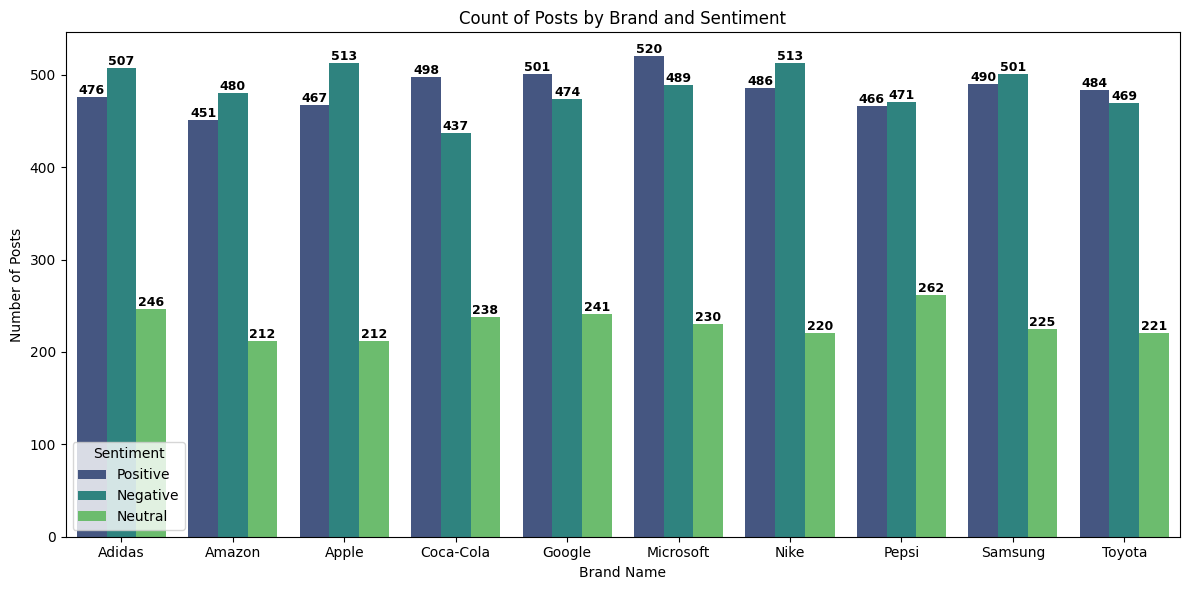

In [15]:
# Count posts by brand_name and sentiment_label
brand_sentiment_counts = df.groupby(['brand_name', 'sentiment_label']).size().reset_index(name='count')

# Sentiment order and color mapping
sentiment_order = ['Positive', 'Negative', 'Neutral']

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=brand_sentiment_counts,
    x='brand_name',
    y='count',
    hue='sentiment_label',
    order=sorted(df['brand_name'].unique()),
    hue_order=sentiment_order,
    palette='viridis'
)

# Showing the value of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('Count of Posts by Brand and Sentiment')
plt.xlabel('Brand Name')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

### Count of posts by Platform and Sentiment

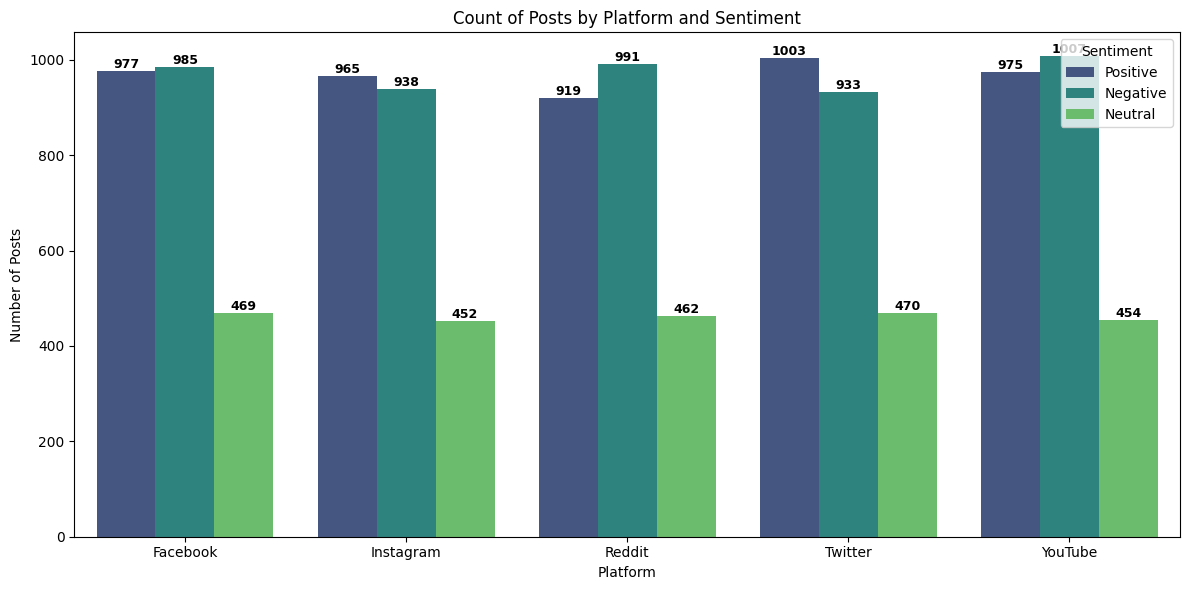

In [16]:
# Count posts by brand_name and sentiment_label
platform_sentiment_counts = df.groupby(['platform', 'sentiment_label']).size().reset_index(name='count')

# Sentiment order and color mapping
sentiment_order = ['Positive', 'Negative', 'Neutral']
#palette = {'Positive': 'cornflowerblue', 'Negative': 'crimson', 'Neutral': 'gray'}
palette = {'Positive': '#481567FF', 'Negative': '#1F968BFF', 'Neutral': '#95D840FF'}

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=platform_sentiment_counts,
    x='platform',
    y='count',
    hue='sentiment_label',
    order=sorted(df['platform'].unique()),
    hue_order=sentiment_order,
    palette='viridis'
)

# Showing the value of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('Count of Posts by Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

### Average Engagement per Platform

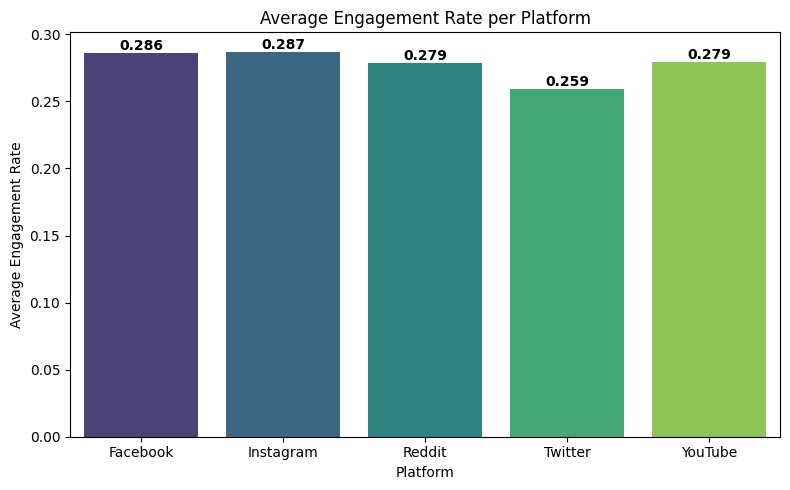

In [17]:
# calculating average engagement rate per platform
avg_engagement = df.groupby('platform')['engagement_rate'].mean().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=avg_engagement,
x='platform',
y='engagement_rate',
palette='viridis',
hue='platform')

for i, row in avg_engagement.iterrows():
    ax.text(i, row['engagement_rate'], f"{row['engagement_rate']:.3f}", ha='center', va='bottom', fontweight='bold')

plt.title('Average Engagement Rate per Platform')
plt.xlabel('Platform')
plt.ylabel('Average Engagement Rate')
plt.tight_layout()
plt.show()

### Scatterplot - Likes Count vs. Toxicity Score

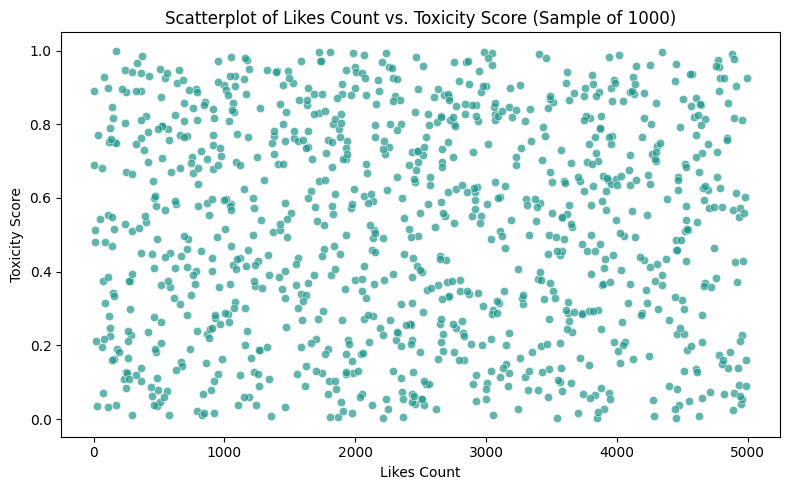

In [18]:
sample_df = df.sample(n=1000, random_state=42)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample_df,
x='likes_count',
y='toxicity_score',
color='#1F968BFF',
alpha=0.7)
plt.title('Scatterplot of Likes Count vs. Toxicity Score (Sample of 1000)')
plt.xlabel('Likes Count')
plt.ylabel('Toxicity Score')
plt.tight_layout()
plt.show()

### Scatterplot - Comments Count vs. Toxicity Score

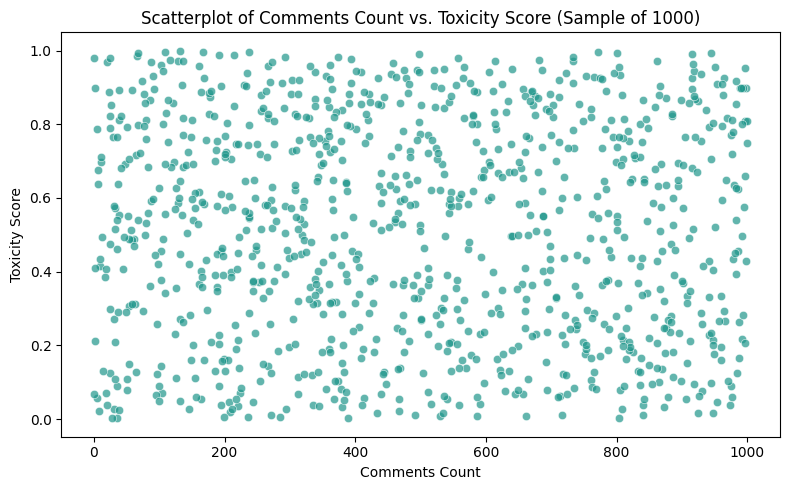

In [19]:
sample_df = df.sample(n=1000, random_state=42)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample_df,
x='comments_count',
y='toxicity_score',
color='#1F968BFF',
alpha=0.7)
plt.title('Scatterplot of Comments Count vs. Toxicity Score (Sample of 1000)')
plt.xlabel('Comments Count')
plt.ylabel('Toxicity Score')
plt.tight_layout()
plt.show()

## Linear Regression Model

### Importing required libraries

 - pandas: for data manipulation and analysis.
 - numpy: to calculate the square root of the Mean Squared Error.
 - train_test_split: to split the dataset into training and test sets.
 - LinearRegression: to create a Linear Regression model.
 - mean_squared_error, mean_absolute_error, r2_score: to calculate the performance of the model.
 - OneHotEncoder: to convert categorical variables into zeroes and ones.
 - ColumnTransformer: to preprocess hot-encoded categorical variables.
 - pyplot: To create visualizations.

In [20]:
# Importing the required library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('Social Media Engagement Dataset.csv')

### Removing unnecessary features

We are going to remove features that are not required to predict Social Media engagement, such as unique identifiers, fields that would require NLP (like `text_content`), fields with high cardinality (`hashtags`, `mentions`), and other non-predictive columns.

In [21]:
features = ['day_of_week', 'platform', 'location', 'language', 
            'sentiment_score', 'emotion_type', 'toxicity_score',
            'likes_count', 'shares_count', 'comments_count', 
            'impressions', 'topic_category', 'campaign_phase',
            'user_past_sentiment_avg', 'user_engagement_growth', 
            'buzz_change_rate']

target = 'engagement_rate'

# Separating features and target
X = df[features]
y = df[target]

# Categorical columns
categorical_cols = ['day_of_week', 'platform', 'location', 'language', 
                    'emotion_type', 'topic_category', 'campaign_phase']
                    
# Numerical columns (all the remaining non-categorical columns)
numerical_cols = [col for col in features if col not in categorical_cols]

### Preprocessing the data, splitting it into Train (80%) and Test (20%) sets.

In [22]:
# Preprocess the data with one-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Splitting the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=100)

### Creating and evaluating the model performance - Linear Regression

In [23]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance")
print('-----------------')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}')


Model Performance
-----------------
Root Mean Squared Error (RMSE): 1.0323
R-squared (R²): 0.1118
Mean Absolute Error: 0.3496


### Predicted vs. Actual values - Linear Regression

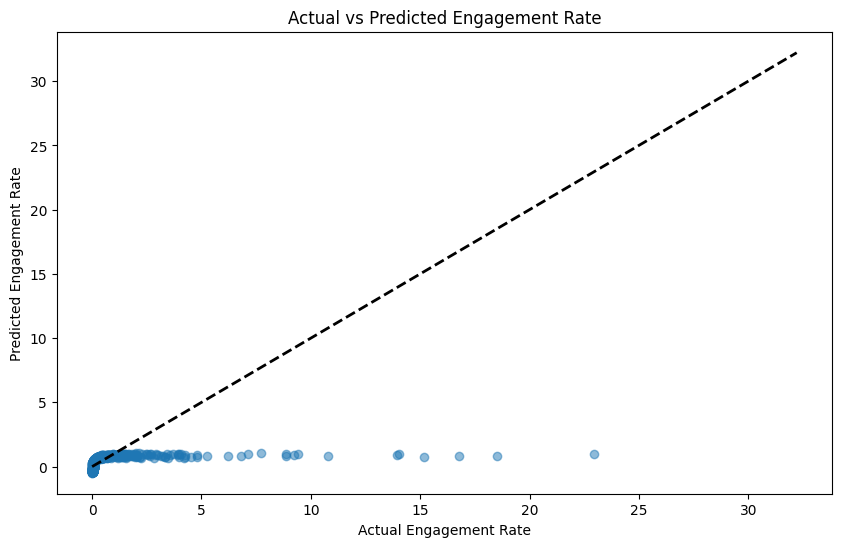

In [24]:
# Visualizing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Actual vs Predicted Engagement Rate')
plt.show()


### Feature Importance - Linear Regression

In [25]:
# Examining feature importance (coefficients)
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(cat_feature_names)

# Creating a data frame of coefficients
coefficients = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print('\nTop 10 Positive Impact Features:')
print(coefficients.head(10))
print('\nTop 10 Negative Impact Features:')
print(coefficients.tail(10))


Top 10 Positive Impact Features:
                      Feature   Coefficient
3                shares_count  7.026817e-05
2                 likes_count  6.464678e-05
4              comments_count  5.284060e-05
69    topic_category_Delivery  3.460225e-06
9          day_of_week_Friday  2.468052e-06
77  campaign_phase_Pre-Launch  1.442138e-06
71     topic_category_Pricing  1.215408e-06
59                language_hi  9.864609e-07
43     location_Paris, France  9.830177e-07
66       emotion_type_Excited  9.123405e-07

Top 10 Negative Impact Features:
                    Feature  Coefficient
73   topic_category_Returns    -0.000001
72   topic_category_Product    -0.000001
60              language_ja    -0.000001
15    day_of_week_Wednesday    -0.000002
74   topic_category_Support    -0.000002
13     day_of_week_Thursday    -0.000002
75    campaign_phase_Launch    -0.000002
6   user_past_sentiment_avg    -0.000005
5               impressions    -0.000012
8          buzz_change_rate    -0.0002

# Random Forest

### Importing required libraries

 - pandas: for data manipulation and analysis.
 - numpy: to calculate the square root of the Mean Squared Error.
 - pyplot/seaborn: To create visualizations.
 - train_test_split: to split the dataset into training and test sets.
 - RandomizedSearchCV: for random search with cross-validation.
 - RandomForestRegressor: to create a Random Forest model.
 - mean_squared_error, mean_absolute_error, r2_score: to calculate the performance of the model.
 - OneHotEncoder: to convert categorical variables into zeroes and ones.
 - ColumnTransformer: to preprocess hot-encoded categorical variables.
 - Pipeline: to chain together multiple data processing steps and model training into one object.
 - SimpleImputer: to handle missing data (in this exercise, with median and most frequent values).
 - randint: to generate random numbers for hyperparameters.


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint

# Loading the dataset
df = pd.read_csv('Social Media Engagement Dataset.csv')

# Dropping columns with high cardinality or not useful for prediction
cols_to_drop = ['post_id', 'timestamp', 'user_id', 'text_content',
'hashtags', 'mentions', 'keywords', 'brand_name', 'product_name']
df = df.drop(cols_to_drop, axis=1)

# Converting categorical columns to appropriate types
categorical_cols = ['day_of_week', 'platform', 'location', 'language', 'topic_category', 
                   'sentiment_label', 'emotion_type',
                   'campaign_name', 'campaign_phase']
df[categorical_cols] = df[categorical_cols].astype('category')

### Feature engineering

In [64]:
# Feature Engineering
# Creating interaction features
df['total_interactions'] = (df['likes_count'] + df['shares_count'] + 
                           df['comments_count'])
df['engagement_per_impression'] = (df['total_interactions'] / 
                                 (df['impressions'] + 1))
df['comments_to_likes_ratio'] = (df['comments_count'] / 
                               (df['likes_count'] + 1))
df['shares_to_likes_ratio'] = (df['shares_count'] / 
                             (df['likes_count'] + 1))

# Log transform skewed numerical features
skewed_features = ['likes_count', 'shares_count', 
                   'comments_count', 'impressions']

for feature in skewed_features:
    df[feature + '_log'] = np.log1p(df[feature])

# Preparing data for modeling
X = df.drop('engagement_rate', axis=1)
y = df['engagement_rate']

### Splitting the data into Training (80%) and Test (20%) sets. 

In [65]:
# Splitting data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = (
train_test_split(X, y, test_size=0.2, random_state=100))

### Preprocessing data, hyperparameter tuning.

In [66]:
# Preprocessing
# Identifying numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Creating transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Creating a Random Forest model pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=100))
])

# Hyperparameter tuning setup
param_dist = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': [None, 10, 20, 30, 50],
    'regressor__min_samples_split': randint(2, 20),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__max_features': ['sqrt', 'log2', 0.5, 0.8]
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=100,
    n_jobs=-1,
    verbose=1
)

print('Starting hyperparameter tuning...')
random_search.fit(X_train, y_train)
print('Hyperparameter tuning completed!')

Starting hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


Hyperparameter tuning completed!


### Evaluating the model - Random Forest

In [67]:
# Getting the best model
best_rf = random_search.best_estimator_

# Making predictions
y_pred = best_rf.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nModel Evaluation Metrics')
print('------------------------')
print(f'Best Parameters: {random_search.best_params_}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')


Model Evaluation Metrics
------------------------
Best Parameters: {'regressor__max_depth': 50, 'regressor__max_features': 0.8, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 6, 'regressor__n_estimators': 142}
Mean Squared Error: 0.0024
Root Mean Squared Error: 0.0495
Mean Absolute Error: 0.0036
R-squared: 0.9980


### Feature Importance - Random Forest

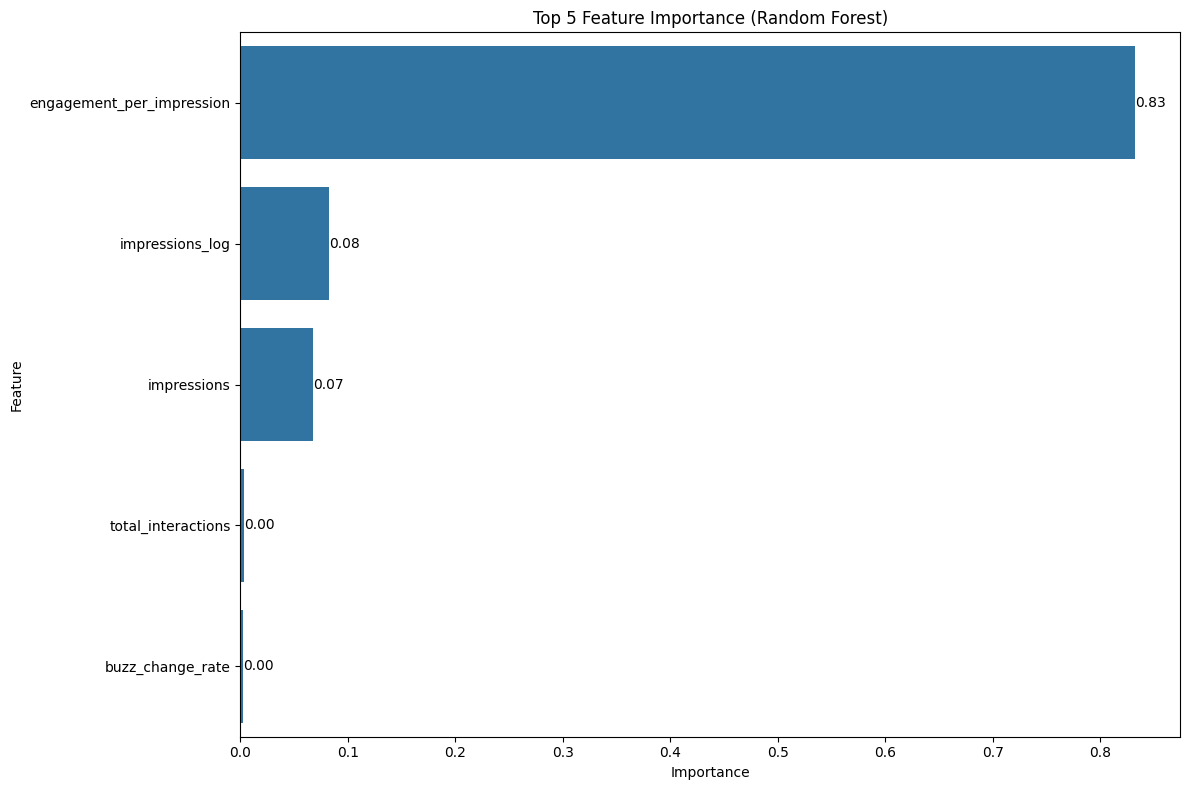

In [70]:
# Feature Importance
# Getting feature names after preprocessing
numeric_feature_names = numeric_features.tolist()
categorical_feature_names = best_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_feature_names + list(categorical_feature_names)

# Getting feature importances
importances = best_rf.named_steps['regressor'].feature_importances_

# Creating a data frame for feature importance
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Importance', 
                       y='Feature', 
                       data=feature_importance.head(5))

# Adding the values at the end of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.2f}', 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center')

plt.title('Top 5 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

### Actual vs. Predicted - Random Forest

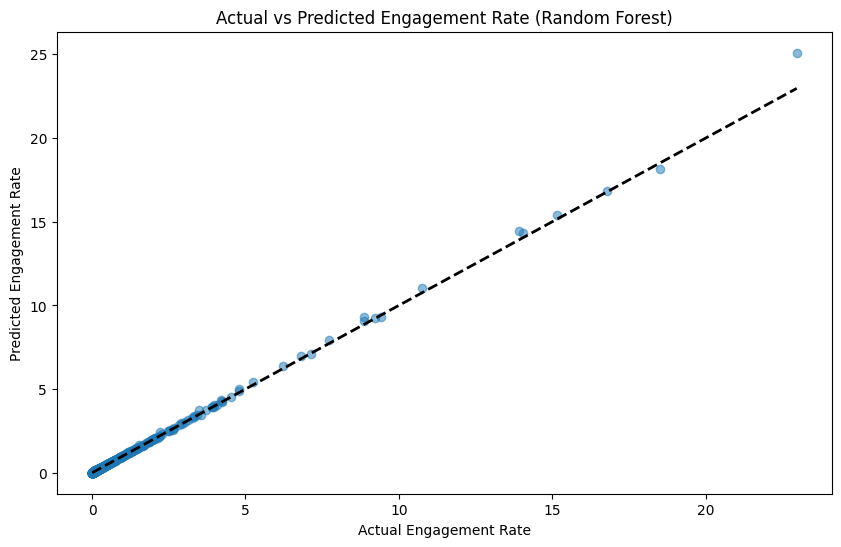

In [32]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Actual vs Predicted Engagement Rate (Random Forest)')
plt.show()


### Residual Plot - Random Forest

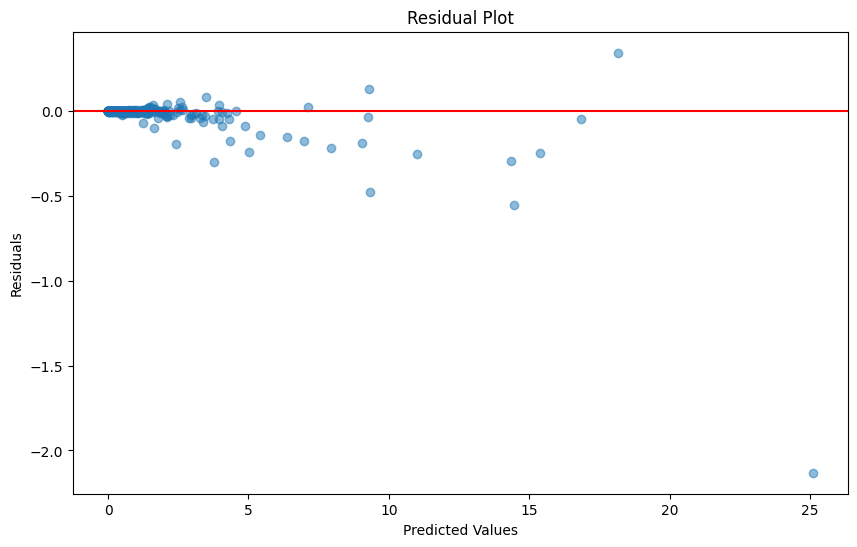

In [33]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# XGBoost

### Importing required libraries

 - pandas: for data manipulation and analysis.
 - numpy: to calculate the square root of the Mean Squared Error.
 - pyplot/seaborn: To create visualizations.
 - train_test_split: to split the dataset into training and test sets.
 - RandomizedSearchCV: for random search with cross-validation.
 - XGBRegressor: to create the XGBoost model pipeline
 - mean_squared_error, mean_absolute_error, r2_score: to calculate the performance of the model.
 - OneHotEncoder: to convert categorical variables into zeroes and ones.
 - ColumnTransformer: to preprocess hot-encoded categorical variables.
 - Pipeline: to chain together multiple data processing steps and model training into one object.
 - SimpleImputer: to handle missing data (in this exercise, with median and most frequent values).
 - randint: to generate random numbers for hyperparameters.
 - uniform: to generate random numbers with a uniform distribution

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform

# Loading the dataset
df = pd.read_csv('Social Media Engagement Dataset.csv')

### Data Preprocessing

In [44]:
# Dropping high-cardinality or non-predictive columns
cols_to_drop = ['post_id', 'timestamp', 'user_id', 'text_content', 'hashtags', 'mentions', 'keywords']
df = df.drop(cols_to_drop, axis=1)

# Converting to categorical
categorical_cols = ['day_of_week', 'platform', 'location', 'language', 'topic_category', 
                   'sentiment_label', 'emotion_type', 'brand_name', 'product_name', 
                   'campaign_name', 'campaign_phase']
                   
df[categorical_cols] = df[categorical_cols].astype('category')

### Feature Engineering

In [45]:
# Interaction features
df['total_interactions'] = df['likes_count'] + df['shares_count'] + df['comments_count']
df['engagement_per_impression'] = df['total_interactions'] / (df['impressions'] + 1)
df['comments_to_likes_ratio'] = df['comments_count'] / (df['likes_count'] + 1)
df['shares_to_likes_ratio'] = df['shares_count'] / (df['likes_count'] + 1)

# Log-transform skewed features
skewed_features = ['likes_count', 'shares_count', 'comments_count', 'impressions']

for feature in skewed_features:
    df[f'log_{feature}'] = np.log1p(df[feature])

### Creating the pipeline

In [46]:
# Defining features and target
X = df.drop('engagement_rate', axis=1)
y = df['engagement_rate']

# Splitting the data into Training (80%) and Test (20%) sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Preprocessing features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# XGBoost model pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=100, n_jobs=-1))
])

### Hyperparameter tuning

In [48]:
param_dist = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': randint(3, 10),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__subsample': uniform(0.6, 0.4),
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__gamma': uniform(0, 0.5),
    'regressor__reg_alpha': uniform(0, 1),
    'regressor__reg_lambda': uniform(0, 1)
}

random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=100,
    n_jobs=-1,
    verbose=1,
)

print('Starting hyperparameter tuning...')
random_search.fit(X_train, y_train)
print('Tuning completed!')

Starting hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuning completed!


### Evaluating the model - XGBoost

In [49]:
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\n=== Best Model Evaluation ===')
print(f'Best Parameters: {random_search.best_params_}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R²): {r2:.4f}')


=== Best Model Evaluation ===
Best Parameters: {'regressor__colsample_bytree': np.float64(0.6113647426853007), 'regressor__gamma': np.float64(0.35066325704675805), 'regressor__learning_rate': np.float64(0.01755146916544357), 'regressor__max_depth': 3, 'regressor__n_estimators': 403, 'regressor__reg_alpha': np.float64(0.07352706186557412), 'regressor__reg_lambda': np.float64(0.06088456434663547), 'regressor__subsample': np.float64(0.6445625266816213)}
Mean Squared Error (MSE): 0.0927
Root Mean Squared Error (RMSE): 0.3045
Mean Absolute Error (MAE): 0.0371
R-squared (R²): 0.9227


### Feature Importance - XGBoost

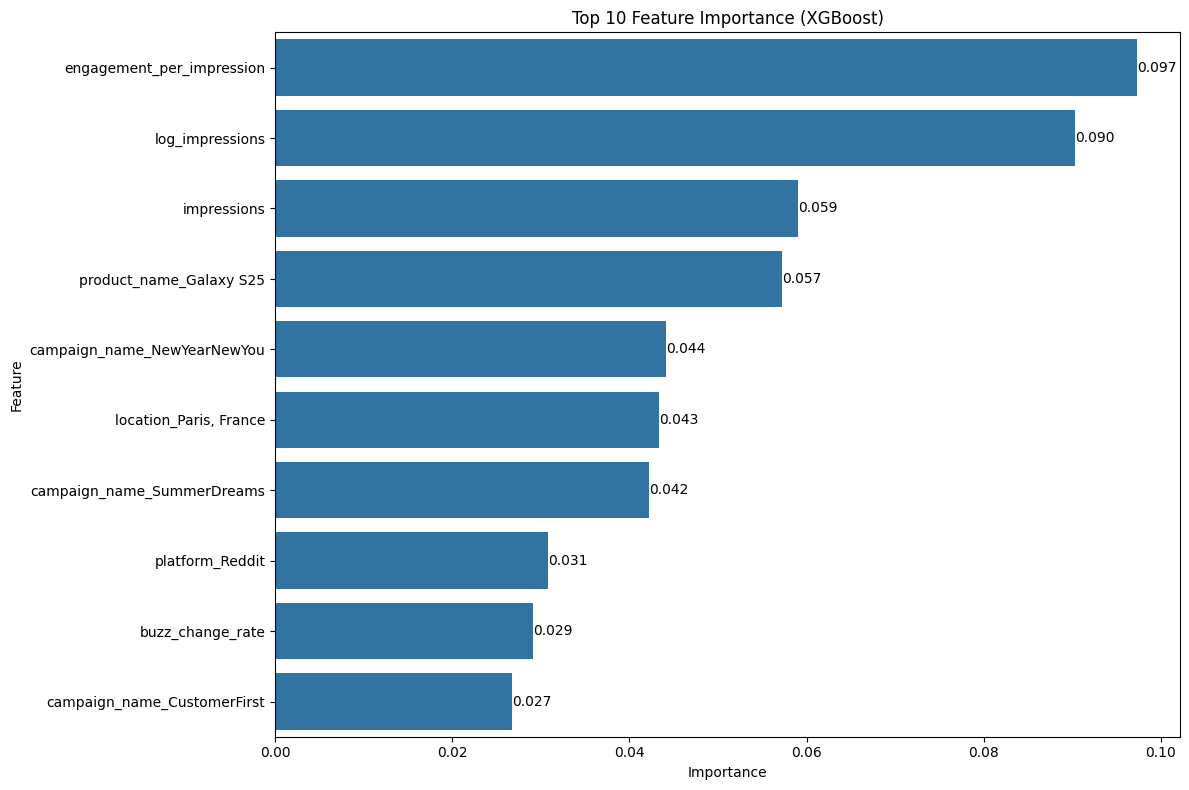

In [61]:
# Creating importance data frame
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Importance',
                       y='Feature', 
                       data=feature_importance.head(10)
                       )

# Adding the values at the end of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.3f}', 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center')

plt.title('Top 10 Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

### Actual vs Predicted values - XGBoost

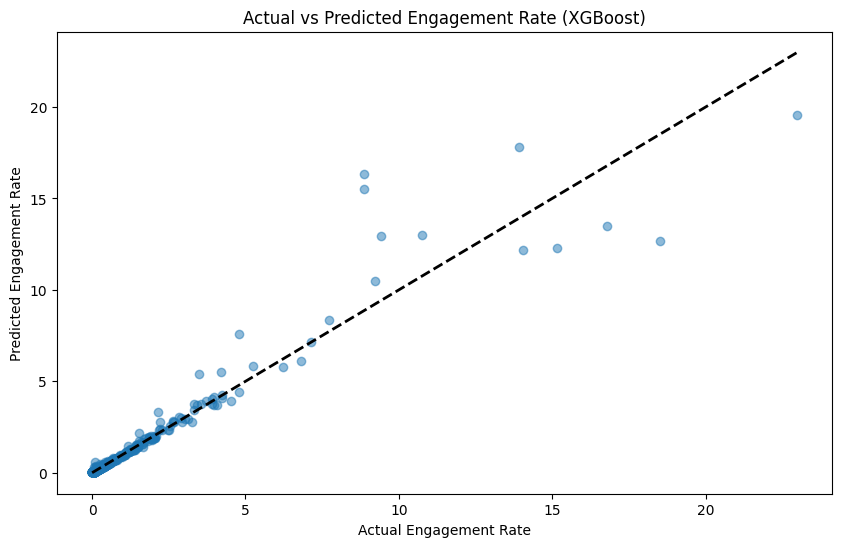

In [51]:
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Actual vs Predicted Engagement Rate (XGBoost)')
plt.show()

### Residual Plot - XGBoost

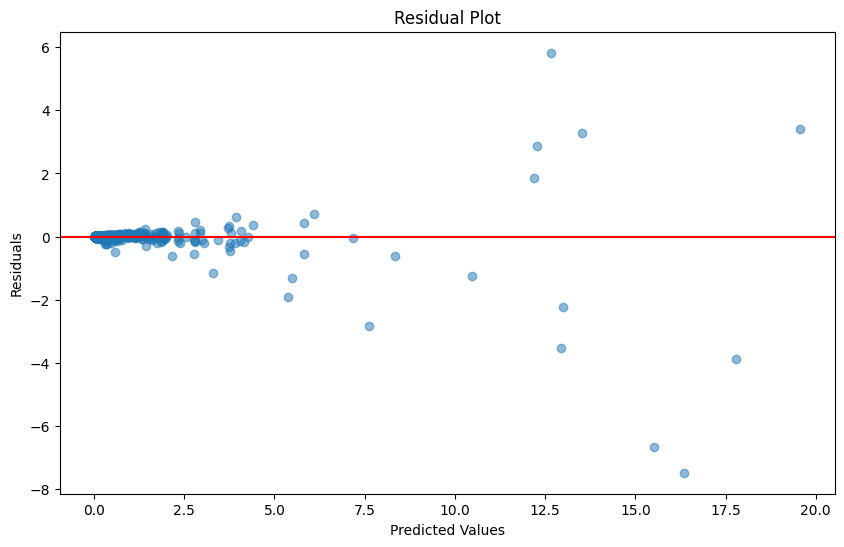

In [52]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
